<a href="https://colab.research.google.com/github/aqafridi/DataScience/blob/main/KPMG_Virtual_Internship_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KPMG Virtual Internship
##Abdul Qadeer
For context, Sprocket Central Pty Ltd is a long-standing KPMG client whom specialises in high-quality bikes and accessible cycling accessories to riders. Their team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour. 

Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, please recommend which of these 1000 new customers should be targeted to drive the most value for the organisation.

### Import important libraries which will be used in program.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import datetime

### Importing datasets into pandas dataframe.

In [ ]:
cus_demo = pd.read_csv(r"C:\Users\lenovo\Downloads\Virtual Internship 2020\KPMG Virtual Internship\KPMG_Customer_Demographic.csv")
cus_demo.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,12-10-53,67,Executive Secretary,Health,Mass Customer,N,Yes,11
1,2,Eli,Bockman,Male,81,16-12-80,40,Administrative Officer,Financial Services,Mass Customer,N,Yes,16


In [ ]:
cus_add = pd.read_csv(r"C:\Users\lenovo\Downloads\Virtual Internship 2020\KPMG Virtual Internship\KPMG_Customer_Address.csv")
cus_add.head(2)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10


In [ ]:
trans = pd.read_csv(r"C:\Users\lenovo\Downloads\Virtual Internship 2020\KPMG Virtual Internship\KPMG_Transactions.csv")
trans.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price($),standard_cost($),product_first_sold_date,Profit($),Profit_Margin(%),Transaction_Month
0,2,3,3120,21-05-17,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,03-03-14,1702.55,537.76,May
1,5,78,787,01-10-17,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,10-08-15,1055.82,248.82,October


## Data Preprocessing

### Add new Age _category column in Customer Demographic dataset

In [ ]:
cus_demo.loc[cus_demo['Age'] < 100, 'Age_category(yrs.)'] = 'Senior Citizen(61-100)'
cus_demo.loc[cus_demo['Age'] < 60, 'Age_category(yrs.)'] = 'Senior Adult(50-60)'
cus_demo.loc[cus_demo['Age'] < 49, 'Age_category(yrs.)'] = 'Adult(25-49)'
cus_demo.loc[cus_demo['Age'] < 24, 'Age_category(yrs.)'] = 'Youth(<24)'

cus_demo.head(4)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age_category(yrs.)
0,1,Laraine,Medendorp,Female,93,12-10-53,67,Executive Secretary,Health,Mass Customer,N,Yes,11,Senior Citizen(61-100)
1,2,Eli,Bockman,Male,81,16-12-80,40,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,Adult(25-49)
2,3,Arlin,Dearle,Male,61,20-01-54,67,Recruiting Manager,Property,Mass Customer,N,Yes,15,Senior Citizen(61-100)
3,5,Sheila-kathryn,Calton,Female,56,13-05-77,43,Senior Editor,NaN,Affluent Customer,N,Yes,8,Adult(25-49)


#### Change datatype of Customer Demographic column to numeric.

In [ ]:
cus_demo["Age"] = pd.to_numeric(cus_demo["Age"])    
cus_demo["tenure"] = pd.to_numeric(cus_demo["tenure"])    
cus_demo["past_3_years_bike_related_purchases"] = pd.to_numeric(cus_demo["past_3_years_bike_related_purchases"])  
cus_demo.head(2)
cus_demo.shape

(3413, 14)

In [ ]:
## CAlculate total number of null/missing values in customer deomgraphic dataframe.
cus_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              105
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
Age                                      0
job_title                                0
job_industry_category                  551
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
Age_category(yrs.)                       0
dtype: int64

#### Check total number of customers in customer demographic data set.

In [ ]:
cus_demo['customer_id'].value_counts()

2047    1
641     1
637     1
2684    1
633     1
       ..
3327    1
1278    1
3323    1
1274    1
2049    1
Name: customer_id, Length: 3413, dtype: int64

#### Remove null values of job industry category from customer demographic dataframe

In [ ]:
cus_demo_nan_job = cus_demo.dropna(subset = ['job_industry_category'], how ='all')
cus_demo_nan_job.head(3)

## Check shape of dataframe
cus_demo_nan_job.shape

(2862, 14)

In [ ]:
## Check total number of customers after removing null values in job category coulmn in cus_demo dataframe.
cus_demo_nan_job['customer_id'].value_counts()

2047    1
1314    1
3397    1
1346    1
3393    1
       ..
2688    1
639     1
2686    1
637     1
2049    1
Name: customer_id, Length: 2862, dtype: int64

### Change datatype of column in Transactions Dataset

In [ ]:
trans["Profit($)"] = pd.to_numeric(trans["Profit($)"])
trans["Profit_Margin(%)"] = pd.to_numeric(trans["Profit_Margin(%)"])
trans["list_price($)"] = pd.to_numeric(trans["list_price($)"])
trans["standard_cost($)"] = pd.to_numeric(trans["standard_cost($)"])

## Check shape of transaction  dataset.
trans.shape

(9642, 16)

In [ ]:
## Check total number of customers in transaction dataset.
trans['customer_id'].value_counts()

353     9
2946    9
3020    9
2240    8
2508    8
       ..
1924    1
2076    1
1017    1
2092    1
2047    1
Name: customer_id, Length: 3291, dtype: int64

In [ ]:
## Check shape of customer address dataset.
cus_add.shape

(3999, 6)

#### Create new dataframe which is intersaction of transaction customer or cus_demo and cus_address.

In [ ]:
trans_cus = pd.merge(cus_demo, trans, on="customer_id", how='inner')

In [ ]:
trans_cus.head(3)
trans_cus.shape

(8308, 29)

In [ ]:
## Count total number of customers who have done transactions.
trans['customer_id'].value_counts()

353     9
2946    9
3020    9
2240    8
2508    8
       ..
1924    1
2076    1
1017    1
2092    1
2047    1
Name: customer_id, Length: 3291, dtype: int64

In [ ]:
## Create a intersaction dataframe of customer demographic with transaction and there address dataframe. 
combo_cus = pd.merge(trans_cus, cus_add, on='customer_id', how='inner')

In [ ]:
## Shape of intersaction dataframe.
combo_cus.shape

(8305, 34)

In [ ]:
combo_cus['customer_id'].value_counts()

3020    9
353     9
25      8
127     8
2309    8
       ..
483     1
2514    1
427     1
2474    1
1827    1
Name: customer_id, Length: 2834, dtype: int64

In [ ]:
## Columns name of intersaction dataframe of three dataframe.
combo_cus.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'Age', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'Age_category(yrs.)', 'transaction_id',
       'product_id', 'transaction_date', 'online_order', 'order_status',
       'brand', 'product_line', 'product_class', 'product_size',
       'list_price($)', 'standard_cost($)', 'product_first_sold_date',
       'Profit($)', 'Profit_Margin(%)', 'Transaction_Month', 'address',
       'postcode', 'state', 'country', 'property_valuation'],
      dtype='object')

In [ ]:
combo_cus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8305 entries, 0 to 8304
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          8305 non-null   int64  
 1   first_name                           8305 non-null   object 
 2   last_name                            8029 non-null   object 
 3   gender                               8305 non-null   object 
 4   past_3_years_bike_related_purchases  8305 non-null   int64  
 5   DOB                                  8305 non-null   object 
 6   Age                                  8305 non-null   int64  
 7   job_title                            8305 non-null   object 
 8   job_industry_category                6946 non-null   object 
 9   wealth_segment                       8305 non-null   object 
 10  deceased_indicator                   8305 non-null   object 
 11  owns_car                      

In [ ]:
combo_cus.transaction_date

0       06-04-17
1       11-05-17
2       14-12-17
3       04-06-17
4       09-12-17
          ...   
8300    18-04-17
8301    15-04-17
8302    02-04-17
8303    08-11-17
8304    01-09-17
Name: transaction_date, Length: 8305, dtype: object

## Data Exploration & Visualization

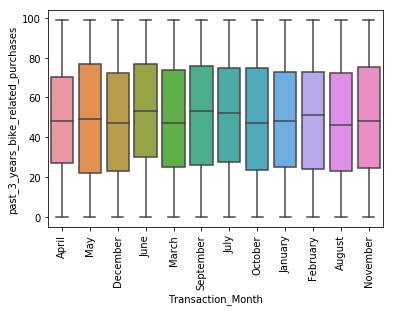

In [ ]:
sns.boxplot(x='Transaction_Month', y='past_3_years_bike_related_purchases', data=combo_cus)
plt.xticks(rotation='vertical')
plt.show()

## Cutomer Address Dataframe 

### Which states has more number of bike customers.

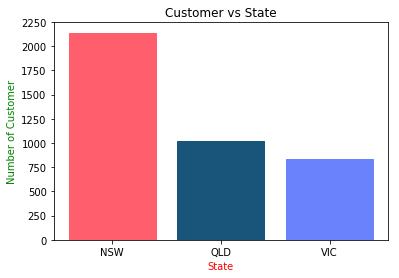

In [ ]:
bar_graph1= plt.bar(cus_add.state.unique(), cus_add["state"].value_counts())

bar_graph1[0].set_color('#FF5F6D')
bar_graph1[1].set_color('#19547b')
bar_graph1[2].set_color('#6A82FB')

plt.ylabel('Number of Customer', color='g')
plt.xlabel('State', color='r')
plt.title("Customer vs State")
plt.show()

According to data, New South Wales(NSW) people purchased more bikes and cycles.Sprocket Central Pty Ltd have more customer base in NSW and lesser in VIC. That means they still need to work on marketing to reach out their product to VIC.

## Customer Demographic Dataframe 

### Which gender purchases more bikes.

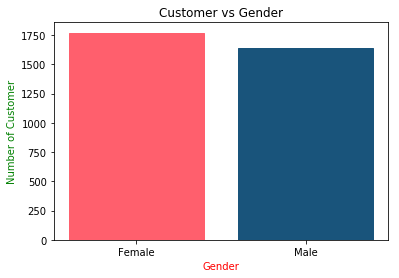

In [ ]:
bar_graph2 = plt.bar(cus_demo.gender.unique(), cus_demo["gender"].value_counts() )

bar_graph2[0].set_color('#FF5F6D')
bar_graph2[1].set_color('#19547b')

plt.ylabel('Number of Customer', color ='g')
plt.xlabel('Gender', color='r')
plt.title("Customer vs Gender")
plt.show()

Sprocket Central Pty Ltd company has slightly more female customers than male. But the difference is not so large.

### Customers of different age group

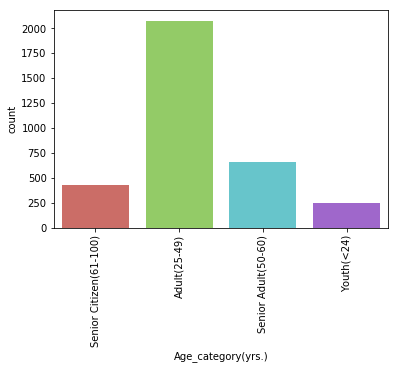

In [ ]:
sns.countplot(x='Age_category(yrs.)', data= cus_demo, palette='hls')
plt.xticks(rotation ='vertical')
plt.show()

### Exploring bikes customers who owns car.

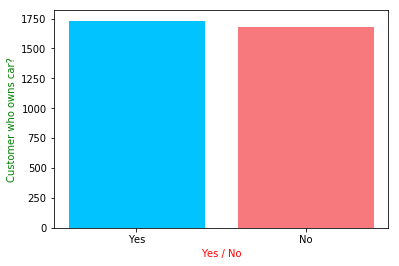

In [ ]:
bar_graph3 = plt.bar(cus_demo.owns_car.unique(), cus_demo["owns_car"].value_counts())

bar_graph3[0].set_color('#00c3ff')
bar_graph3[1].set_color('#f7797d')

plt.ylabel('Customer who owns car?', color ='g')
plt.xlabel('Yes / No', color='r')
plt.show()

According to data, most of the customers who purchases bike and cycling accessories from Sprocket Central Pty Ltd have car. May be their work place is near to their house or they are helping in reducing greenhouse gas production. But there is negligible difference. 

###  Which wealth segment purchases more bikes.

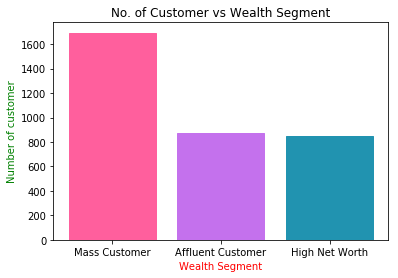

In [ ]:
bar_graph4 = plt.bar(cus_demo.wealth_segment.unique(), cus_demo["wealth_segment"].value_counts())

bar_graph4[0].set_color('#FF5F9D')
bar_graph4[1].set_color('#c471ed')
bar_graph4[2].set_color('#2193b0')

plt.ylabel('Number of customer', color='g')
plt.xlabel('Wealth Segment', color='r')
plt.title("No. of Customer vs Wealth Segment")
plt.show()

A large number customers who purchased bikes and cycling accessories from Sprocket Central Pty Ltd belongs to "Mass customer" wealth segment category. 

### Which gender purchased more bikes in past 3 years.

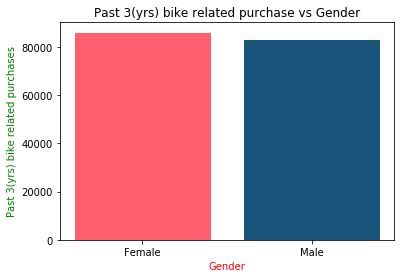

In [ ]:
results1 = cus_demo.groupby("gender").sum()
bar_graph5 = plt.bar(cus_demo.gender.unique(), results1["past_3_years_bike_related_purchases"])

bar_graph5[0].set_color('#FF5F6D')
bar_graph5[1].set_color('#19547b')

plt.ylabel('Past 3(yrs) bike related purchases', color='g')
plt.xlabel('Gender', color='r')
plt.title("Past 3(yrs) bike related purchase vs Gender")
plt.show()

In past 3 years female purchased more bikes related accessories from Sprocket Central Pty Ltd. They should launch some exclusive products for female customers to increase their sales.

### Customers belongs to which job industry.

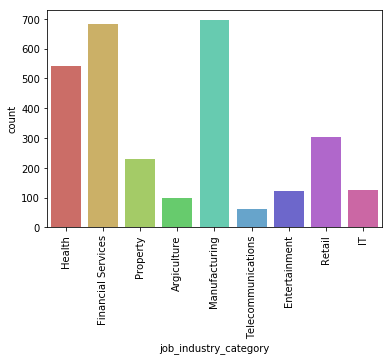

In [ ]:
sns.countplot(x='job_industry_category', data= cus_demo_nan_job, palette='hls')
plt.xticks(rotation ='vertical')
plt.show()

## Transactions Dataset

### Number of customer month wise

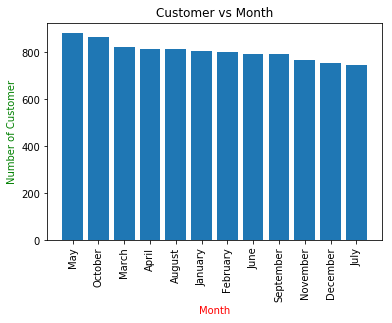

In [ ]:
plt.bar(trans.Transaction_Month.unique(), trans["Transaction_Month"].value_counts())

plt.xticks(rotation='vertical')
plt.ylabel('Number of Customer', color='g')
plt.xlabel('Month', color='r')
plt.title("Customer vs Month")
plt.show()

### Which size of product is most selling and the does the cost of product increases sell.

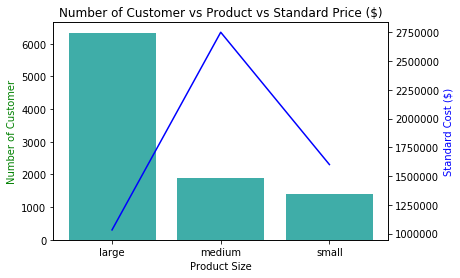

In [ ]:
results9 = trans.groupby("product_size").sum()

fig, ax1=plt.subplots()

ax2 = ax1.twinx()
ax1.bar(trans.product_size.unique(), trans["product_size"].value_counts(), color = '#3fada8')
ax2.plot(trans.product_size.unique(), results9["standard_cost($)"], 'b-')

ax1.set_xlabel('Product Size')
ax1.set_ylabel('Number of Customer', color ='g')
ax2.set_ylabel('Standard Cost ($)', color='b')
plt.title("Number of Customer vs Product vs Standard Price ($)")
plt.show()

It is clearly shown in graph that large size product has higher demand. One of the main reason of highest sell of large size product is the lesser cost. According to this low price product attracts highest number of customers.

### Profit Margin (%) return by product of different size. 

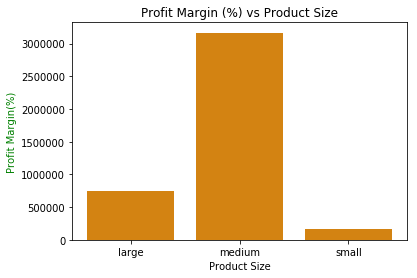

In [ ]:
results3 = trans.groupby("product_size").sum()
plt.bar(trans.product_size.unique(), results3["Profit_Margin(%)"], color='#d38312')

plt.ylabel('Profit Margin(%)', color='g')
plt.xlabel('Product Size')
plt.title("Profit Margin (%) vs Product Size")
plt.show()

### Which brand is most selling brand.

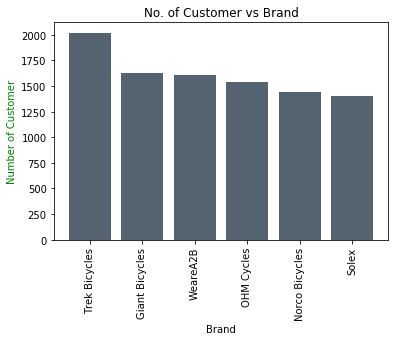

In [ ]:
plt.bar(trans.brand.unique(), trans["brand"].value_counts(), color='#556270')

plt.xticks(rotation = "vertical", size=10)
plt.ylabel('Number of Customer', color='g')
plt.xlabel('Brand')
plt.title("No. of Customer vs Brand")
plt.show()

According to transactions dataframe, most selling brand of Sprocket Central Pty Ltd is Trek Bicycles and their is not much difference in other brands.

### Which brand has higher profit margin (%).

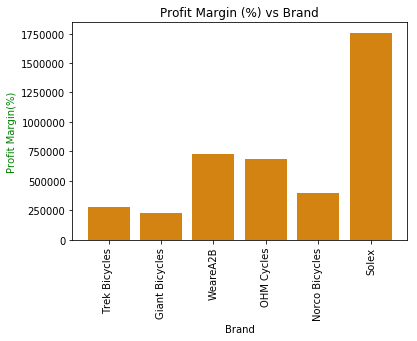

In [ ]:
results2 = trans.groupby("brand").sum()
plt.bar(trans.brand.unique(), results2["Profit_Margin(%)"], color='#d38312')

plt.xticks(rotation = 'vertical')
plt.ylabel('Profit Margin(%)', color='g')
plt.xlabel('Brand')
plt.title("Profit Margin (%) vs Brand")
plt.show()

Solex brand returns most profit margin than other brands that means the selling price of Solex brand is too high than standard price. It shows company can produce too much profit if customer base of Solex will increase and to do that company will introduced offers in new purchase of Solex.

### Which brand is most profitable($) .

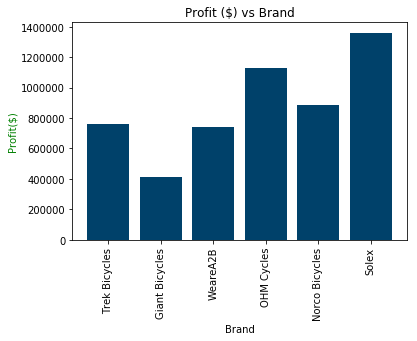

In [ ]:
results2 = trans.groupby("brand").sum()
plt.bar(trans.brand.unique(), results2["Profit($)"], color='#00416a')

plt.xticks(rotation = 'vertical')
plt.ylabel('Profit($)', color='g')
plt.xlabel('Brand')
plt.title("Profit ($) vs Brand")
plt.show()

### Realtion between Selling Price and Standard Price of a bike brand.

In [ ]:
brand_group = trans.groupby('brand')
list_price = brand_group.sum()['list_price($)']

brands = [product for product, df in brand_group]

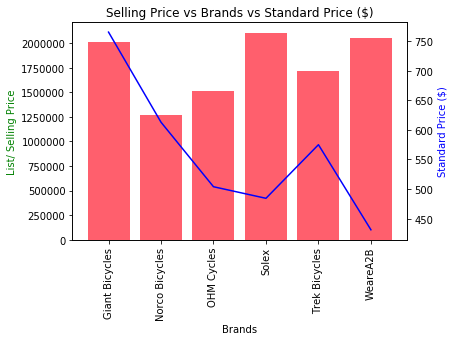

In [ ]:
##To prove some products ordered more beacuse of their price.
prices = trans.groupby('brand').mean()['standard_cost($)']

fig, ax1=plt.subplots()

ax2 = ax1.twinx()
ax1.bar(brands, list_price, color = '#FF5F6D')
ax2.plot(brands, prices, 'b-')

ax1.set_xlabel('Brands')
ax1.set_ylabel('List/ Selling Price', color ='g')
ax2.set_ylabel('Standard Price ($)', color='b')
ax1.set_xticklabels(brands, rotation = 'vertical', size=10)
plt.title("Selling Price vs Brands vs Standard Price ($)")
plt.show()

### Analyze profit achieved by brand under different product size. 

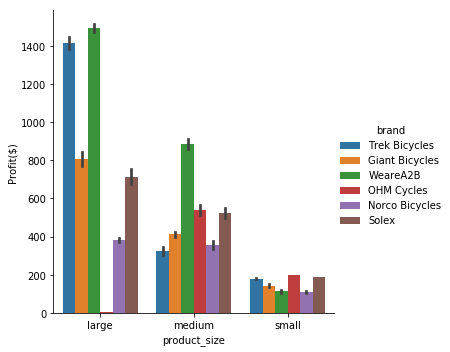

In [ ]:
sns.catplot(x="product_size", y="Profit($)", hue="brand", kind="bar", data=trans);

Trek bicycles and WeareA2B brands produce good profit in all range of size of products.